In [12]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [13]:
# Data given
n = 100

# distance in meters
d = []
for i in range(1, 101):
  d.append(i)               # Since distance between consecutive points is 1 unit and there are 100 points

# existing elevation
e = []
for i in range(1, 101):
  e.append(5*np.sin(i*3*np.pi/100) + np.sin(i*10*np.pi/100))

D1 = .08
D2 = .025
D3 = .005

In [14]:
# height of road
h = cp.Variable(n)

# difference between height of the roadbed and the current elevation of the road
u = h - e

In [15]:
phi_fill = 2*cp.square(cp.pos(u)) + 30*cp.pos(u)    # fill cost
phi_cut = 12*cp.square(cp.neg(u)) + cp.neg(u)       # cut cost

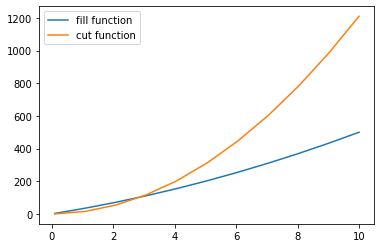

In [16]:
# To verify the convexity of cut and fill functions
plt.figure()
x = np.linspace(0.1, 10, 11)
plt.plot(x, 2*x*x + 30*x, label = 'fill function')
plt.plot(x, 12*x*x + x, label = 'cut function')
plt.legend()
plt.show()

From the above graphs of fill and cut functions, it is clear that both of the functions are convex. Thus minimizing convex functions is a convex optimization problem.

In [17]:
# Our objective is to minimize total cost in filling and cutting
C = cp.sum(phi_fill) + cp.sum(phi_cut)
objective = cp.Minimize(C)

In [18]:
h1 = cp.diff(h, 1, 0)        # first derivative
h2 = cp.diff(h, 2, 0)        # second derivative
h3 = cp.diff(h, 3, 0)        # third derivative

# cp.diff function is used to calculate derivative of cp variable along a given axis

constraints = [cp.abs(h1) <= D1, cp.abs(h2) <= D2, cp.abs(h3) <= D3]

In [19]:
problem = cp.Problem(objective, constraints)
print("Total optimal cost :", problem.solve(solver=cp.ECOS))

Total optimal cost : 7562.815571966297


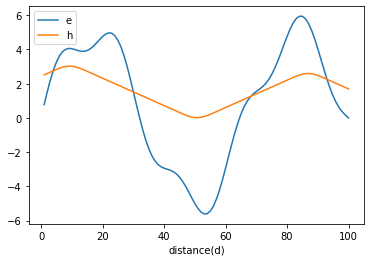

In [20]:
# Graphs of existing elevation and height of roadbed
plt.figure()
plt.plot(d, e, label = 'e')
plt.plot(d, h.value, label = 'h')
plt.xlabel('distance(d)')
plt.legend()
plt.show()

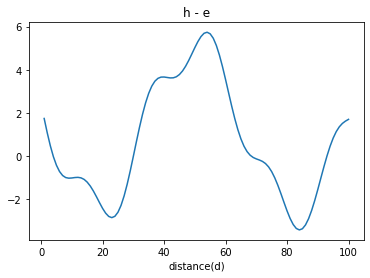

In [21]:
# Graph of h-e
plt.figure()
plt.plot(d, h.value - e)
plt.xlabel('distance(d)')
plt.title('h - e')
plt.show()